# Учебный проект: Исследование успешности компьютерных игр
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<p>Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.</p>
<p>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<b>Задачи исследования:</b>
<p>1. Выбрать несколько потенциально прибыльных платформ</p>
<p>2. Установить, как влияют на продажи отзывы пользователей и критиков
<p>3. Выделить наиболее прибыльные жанры игр.
<p>4. Составить портрет пользователя каждого региона
<p>5. Проверить гипотезы о средних пользовательских рейтингах

<b>Ход исследования:</b>
<p>Данные об играх я получу из файла '/datasets/games.csv'. О качестве данных ничего не известно. Поэтому перед тем, как приступить к задачам исследования, необходимо провести обзор данных.
<p>Я проверю данные на наличие ошибок и их влияние на результат исследования. Далее, на этапе предобработки, я исправлю ошибки в данных там, где это возможно и где это не приведёт к искажению результата. Затем создам необходимые столбцы и приступлю к проведению исследовательского анализа.
<p><b>Таким образом, исследование будет состоять из следующих этапов:</b>
        <p>- Обзор данных
        <p>- Предобработка данных
        <p>- Расчёты и добавление данных в таблицу
        <p>- Проведение анализа для различных игровых платформ
        <p>- Выявление факторов, влияющих на стоимость игр
        <p>- Проведение анализа для различных регионов
        <p>- Проверка гипотез
        <p>- Общий вывод

<b>Столбцы датасета:</b>
<p>name — название игры
<p>platform — платформа
<p>year_of_release — год выпуска
<p>genre — жанр игры
<p>na_sales — продажи в Северной Америке (миллионы проданных копий)
<p>eu_sales — продажи в Европе (миллионы проданных копий)
<p>jp_sales — продажи в Японии (миллионы проданных копий)
<p>other_sales — продажи в других странах (миллионы проданных копий)
<p>critic_Score — оценка критиков (максимум 100)
<p>user_Score — оценка пользователей (максимум 10)
<p>rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Откроем файл с данными и изучим общую информацию.

#### Загружаем библиотеки

In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

#### Открываем файл

In [2]:
try:
    data = pd.read_csv('C:/Users/Даша/Desktop/Python/games.csv')
except:
    data = pd.read_csv('*/games.csv')

#### Выводим первые 20 строк таблицы, изучаем данные

In [3]:
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Используем метод 'info' для более глубокого понимания полученных данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Редактируем названия столбцов
<p>Переводим все названия столбцов в нижний регистр

In [5]:
data.columns = map(str.lower, data.columns)

Проверяем

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Строим общую гистограмму для всех числовых столбцов таблицы

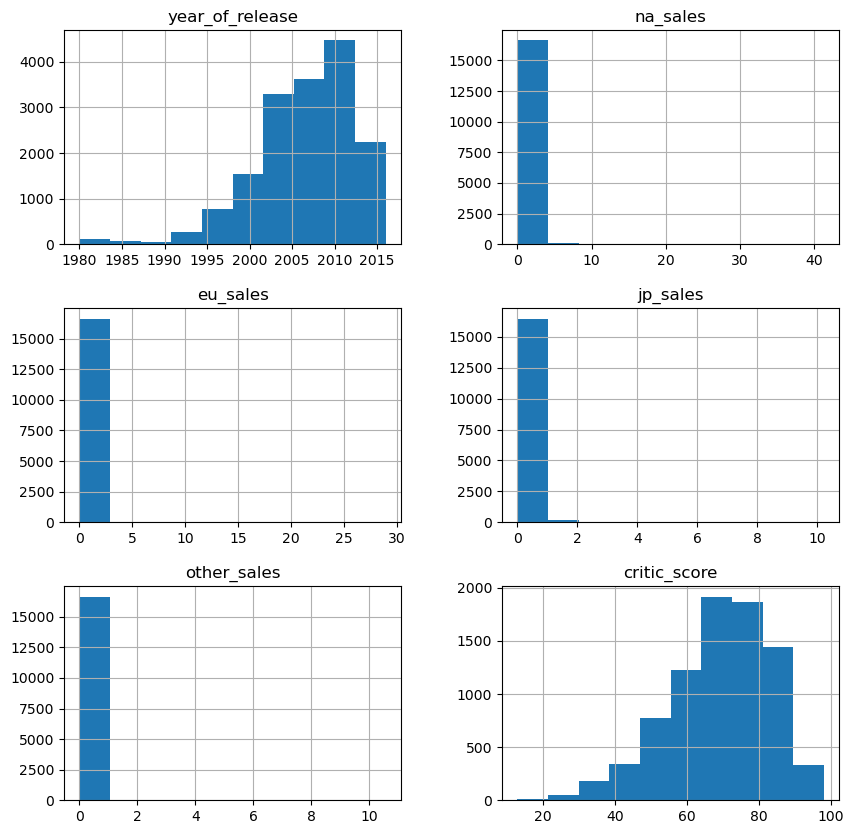

In [7]:
data.hist(figsize=(10, 10));

Как видно из полученных гистограмм, большинство игр было выпущено в период 2010-2013. Отзывы критиков обычно варьируются в пределах 65-80 баллов. А продажи в различных регионах примерно равны по объему.

### Предобработка данных

#### Проверяем, в каких столбцах есть пропуски

In [8]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


В процентах:

In [9]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


#### Причины появления пропусков и способы их заполнения
<p>Пропуски находятся в следующих столбцах:</p>
<p><b>- Название игры (name)</b> в данном столбце пропуски могут быть обусловлены ошибками в данных или попаданием в выборку, например, предстоящих игр, ещё не имеющих названия, но зарегестрированых на платформе. Пропуски в данном столюце занимают менее 1% от всего объема данных, поэтому строки, содержащие пустые значения в данном столбце, можно <b>удалить.</b></p>
<p><b>- Год выпуска (year_of_release)</b> в данном столбце пропуски обусловлены отсутствием данных о годе выпуска игры в системе. Стоки с пропусками в данном столбце также лучше <b>удалить</b>, поскольку они составляют всего 2% от общего объема данных и не исказят результатов исследовательского анализа.</p>
<p><b>- Жанр (genre)</b> в данном столбце пропуски обусловлены отсутствием данных о годе выпуска игры в системе. Стоки с пропусками в данном столбце также лучше <b>удалить</b>, поскольку они составляют менее 1% от всего объема данных</p>
<p><b>- Оценка критиков (critic_score)</b> в данном столбце пропуски обусловлены отсутствием оценки данной игры критиками. Поскольку пропусков в данном столбце много (около 51% от общего объема данных), их необходимо заполнить, однако это не представляется возможным без искажения данных. Поэтому данные пропуски придётся оставить без изменений.</p>
<p><b>- Оценка пользователей (user_score)</b> в данном столбце пропуски обусловлены отсутствием оценки данной игры критиками. Поскольку пропусков в данном столбце много (около 40% от общего объема данных),  их необходимо заполнить, однако это не представляется возможным без искажения данных. Поэтому данные пропуски придётся оставить без изменений.</p>
<p><b>- Рейтинг от организации ESRB (rating)</b> в данном столбце пропуски обусловлены отсутствием информации в системе о возрастном рейтинге, присвоенном играм организацией ESRB. Пропуске в данном столбце можно заполнить строчным значением<b> 'RP'</b>, поскольку это означает отсутствие рейтинга для данной игры от этой организации.</p>

##### Заполняем пропуски в столбце с Названием игры (name)
Удаляем строки, содержащие пропуски в данном столбце

In [10]:
data.dropna(subset=['name'],inplace=True)
print(data['name'].isna().sum())

0


##### Заполняем пропуски в столбце с Годом выпуска (year_of_release)
Удаляем строки, содержащие пропуски в данном столбце

In [11]:
data.dropna(subset=['year_of_release'],inplace=True)
print(data['year_of_release'].isna().sum())

0


##### Заполняем пропуски в столбце с Жанром (genre)
Удаляем строки, содержащие пропуски в данном столбце

In [12]:
data.dropna(subset=['genre'],inplace=True)
print(data['genre'].isna().sum())

0


In [13]:
data.reset_index(drop=True,inplace=True)

##### Заполняем пропуски в столбце с Оценкой критиков (critic_score) и Оценкой пользователей (user_score)
Посмотрим, есть ли смысл искать взаимосвязь между оценкой критиков и оценкой пользователей

In [14]:
data['critic_score'][data['user_score'].isna() == True]

1       NaN
4       NaN
5       NaN
9       NaN
10      NaN
         ..
16439   NaN
16440   NaN
16441   NaN
16442   NaN
16443   NaN
Name: critic_score, Length: 6605, dtype: float64

Как видим, игры, не имеющие оценки критиков, также не имеют оценки пользователей. Значит, найти взаимосвязь между двумя этими показателями не получится.

Проверим, нет ли лишних значений в столбцах с оценкой критиков и пользователей

In [15]:
print(data['critic_score'].unique())
print(data['user_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Видим, что в столбце с оцекой пользователей есть лишнее значение 'tbd' - to be determined. 
<p>Посмотрим, сколько строк содержат данное значение (в процентном соотношении к общему количеству строк в данном столбце)
   

In [16]:
round(data[data['user_score'] == 'tbd']['user_score'].count()/data['user_score'].count() * 100)

24

Данное значение в столбце с оценкой пользователей содержит 24% строк датасета. Поскольку это достаточно большое значение, удалить данные строки не представляется возможным, иначе это повлияет на результат дальнейшего исследования. 
<p>Поэтому заменим все значения "tbd" на "Nan" в данном столбце, чтобы не исказить дальнейшие вычисления.

In [17]:
data['user_score'].replace('tbd', np.NaN)

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16439    NaN
16440    NaN
16441    NaN
16442    NaN
16443    NaN
Name: user_score, Length: 16444, dtype: object

In [18]:
for i in range(len(data)):
    if data.loc[i,'user_score'] == 'tbd':
        data.loc[i,'user_score'] = data.loc[i,'critic_score']
        
data[data['user_score'] == 'tbd']['user_score'].count()

0

Все значения 'tbd' в столбце с оценкой пользователей были заменены  на Nan.

Необходимо также привести столбцы с оценкой пользователей и критиков к одной системе оценивания: умножить все значения столбца с оценкой пользователей на 10 . Так, найдём значения столбца с оценкой пользователей, которые меньше или равны 10 и умножим их на 10. Перед этим приведём значния столбца к типу float.

In [19]:
data['user_score'] = data['user_score'].astype('float')
for i in range(len(data)):
    if data.loc[i,'user_score'] <= 10:
        data.loc[i,'user_score'] = data.loc[i,'user_score'] * 10
data['user_score']

0        80.0
1         NaN
2        83.0
3        80.0
4         NaN
         ... 
16439     NaN
16440     NaN
16441     NaN
16442     NaN
16443     NaN
Name: user_score, Length: 16444, dtype: float64

Остальные пропуски в столбцах с оценкой критиков и пользователей оставим без изменений, поскольку их заполнение без искажения данных не представляется возможным.

##### Заполняем пропуски в столбце с Рейтингом от организации ESRB (rating)
Заполним все пропуски значением 'RP'

In [20]:
data['rating'].fillna(value='RP',inplace=True)
print(data['rating'].isna().sum())

0


##### Проверяем, все ли пропуски устранены
Кроме столбцов с оценкой критиков (critic_score) и пользователей(user_score)

In [21]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         7925
rating                0
dtype: int64

#### Рассмотрим типы данных в каждом столбце

In [22]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

##### Необходимо изменить тип данных в столбцах:
<p><b>- Год выпуска (year_of_release)</b>, данные необходимо перевести к целочисленному типу для упрощения дальнейших вычислений.</p>
<p><b>- Оценка критиков (critic_score)</b>, данные необходимо привести к целочисленному типу, так как дробных оценок в 100-бальной системе нет. Это упростит дальнейшие вычисления.</p>
<p><b>- Оценка пользователей (user_score)</b>, данные необходимо привести к целочисленному типу, так как дробных оценок в 100-бальной системе нет. Это упростит дальнейшие вычисления.</p>

##### Меняем тип данных в столбце Год выпуска (year_of_release)

In [23]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16439    2016
16440    2006
16441    2016
16442    2003
16443    2016
Name: year_of_release, Length: 16444, dtype: int32

##### Меняем тип данных в столбце Оценка критиков (critic_score)

In [24]:
data['critic_score'] = data['critic_score'].astype('int',errors='ignore')
data['critic_score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16439     NaN
16440     NaN
16441     NaN
16442     NaN
16443     NaN
Name: critic_score, Length: 16444, dtype: float64

##### Меняем тип данных в столбце Оценка пользователей (user_score)

In [25]:
data['user_score'] = data['user_score'].astype('int',errors='ignore')
data['user_score']

0        80.0
1         NaN
2        83.0
3        80.0
4         NaN
         ... 
16439     NaN
16440     NaN
16441     NaN
16442     NaN
16443     NaN
Name: user_score, Length: 16444, dtype: float64

#### Устранение дубликатов

##### Устраняем явные дубликаты

In [26]:
data.duplicated().sum()

0

Явных дубликатов в данном датафрейме нет.

##### Устраняем неявные дубликаты

<b>Неявные дубликаты могут присутствовать в столбцах:</b>
<p><b>- Название игры (name)</b> - значения игр могут быть написаны в разном регистре или содержать опечатки;
<p><b>- Платформа (platform)</b> - значения платформ могут быть написаны в разном регистре или содержать опечатки;
<p><b>- Жанр (genre)</b> - значения жанров могут быть написаны в разном регистре или содержать опечатки;
<p><b>- Рейтинг от организации ESRB (rating)</b> - значения могут быть написаны в разном регистре.

##### Устранение неявных дубликатов в столбце Название игры (name)
Изучим уникальные значения в данном столбце и их количество

In [27]:
print(data[data['name'].duplicated() == False]['name'].count())
print(data['name'].unique())

11426
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


Поскольку уникальных значений слишком много, сделаем упрощённую проверку: приведём все названия игр к нижнему регистру и проверим на дубликаты.

In [28]:
data['name'] = data['name'].str.lower()
data.drop_duplicates('name',inplace=True)

print(data[data['name'].duplicated() == False]['name'].count())
print(data['name'].unique())

11426
['wii sports' 'super mario bros.' 'mario kart wii' ...
 'woody woodpecker in crazy castle 5' 'lma manager 2007'
 'haitaka no psychedelica']


Видим, что в столбце могут присутствовать дубликаты одной игры на разных платформах. Отфильтруем такие игры и удалим дубликаты с помощью специальной функции.

Выведем уникальные значения столбца 'platform', чтобы увидеть список всех возможных платформ.

In [29]:
platform = data['platform'].unique()
print(platform)

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'WiiU' 'GC' 'GEN' 'XOne' 'DC' 'SAT' 'PSV'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


И создадим функцию для фильтрации названий игр.

In [30]:
def duplicates_filter(game):
    if 'wii' in game:
        return game.replace('wii','')
    elif 'nes' in game:
        return game.replace('nes','')
    elif 'gb' in game:
        return game.replace('gb','')
    elif 'ds' in game:
        return game.replace('ds','')
    elif 'x360' in game:
        return game.replace('x360','')
    elif 'ps3' in game:
        return game.replace('ps3','')
    elif 'ps2' in game:
        return game.replace('ps2','')
    elif 'snes' in game:
        return game.replace('snes','')
    elif 'gba' in game:
        return game.replace('gba','')
    elif 'ps4' in game:
        return game.replace('ps4','')
    elif '3ds' in game:
        return game.replace('3ds','')
    
    elif 'n64' in game:
        return game.replace('n64','')
    elif 'ps' in game:
        return game.replace('ps','')
    elif 'xb' in game:
        return game.replace('xb','')
    elif 'pc' in game:
        return game.replace('pc','')
    elif '2600' in game:
        return game.replace('2600','')
    elif 'psp' in game:
        return game.replace('psp','')
    elif 'wiiu' in game:
        return game.replace('wiiu','')
    elif 'gc' in game:
        return game.replace('gc','')
    elif 'gen' in game:
        return game.replace('gen','')
    elif 'xone' in game:
        return game.replace('xone','')
    
    elif 'dc' in game:
        return game.replace('dc','')
    elif 'sat' in game:
        return game.replace('sat','')
    elif 'psv' in game:
        return game.replace('psv','')
    elif 'scd' in game:
        return game.replace('scd','')
    elif 'ws' in game:
        return game.replace('ws','')
    elif 'ng' in game:
        return game.replace('ng','')
    elif 'tg16' in game:
        return game.replace('tg16','')
    elif '3do' in game:
        return game.replace('3do','')
    elif 'gg' in game:
        return game.replace('gg','')
    elif 'pcfx' in game:
        return game.replace('pcfx','')
    
    elif ' ' in game:
        return game.replace(' ','')
    elif '.' in game:
        return game.replace('.','')
    elif '!' in game:
        return game.replace('!','')
    
    else:
        return game

Применяем функцию к столбцу, результат сохраням в новый столбец (name_filtered).
<p>Также выводим уникальные значения и их количество

In [31]:
data['name_filtered'] = data['name'].apply(duplicates_filter)
data['name_filtered'] = data['name_filtered'].apply(duplicates_filter)
data['name_filtered'] = data['name_filtered'].apply(duplicates_filter)

print(data[data['name_filtered'].duplicated() == False]['name_filtered'].count())
print(data['name_filtered'].unique())

11386
['sports' 'supermariobros' 'mariokart' ... 'woodywoodpeckerincrazycastle5'
 'lmamanager2007' 'haitakanoychedelica']


Как видно из результата, уникальных значений стало меньше, значит, удалось убрать неявные дубликаты, связанные с наличием имени платформы в названии игр.

##### Устранение неявных дубликатов в столбце Платформа (platform)
Изучим уникальные значения в данном столбце и их количество

In [32]:
print(data[data['platform'].duplicated() == False]['platform'].count())
print(data['platform'].unique())

31
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'WiiU' 'GC' 'GEN' 'XOne' 'DC' 'SAT' 'PSV'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Дупликаты в данном столбце обнаружены не были.

##### Устранение неявных дубликатов в столбце Жанр (genre)
Изучим уникальные значения в данном столбце и их количество

In [33]:
print(data[data['genre'].duplicated() == False]['genre'].count())
print(data['genre'].unique())

12
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


Дупликаты в данном столбце обнаружены не были.

##### Устранение неявных дубликатов в столбце Рейтинг от организации ESRB (rating)
Изучим уникальные значения в данном столбце и их количество

In [34]:
print(data[data['rating'].duplicated() == False]['rating'].count())
print(data['rating'].unique())

7
['E' 'RP' 'M' 'T' 'E10+' 'K-A' 'EC']


Согласно данным на <a href="https://www.esrb.org/ratings-guide/">официальном сайте организации ESRB</a>, существует 7 ступеней рейтинга: E, E10+, T, M, A(AO), RP и RPLM.
<p>Соответственно, скорее всего, значение 'EC' является опечаткой и относится либо к 'E' либо к 'E10+', а значение 'K-A' относится к 'A'. Заменим эти значения ('EC' приведем к 'E', поскольку это больше похоже на опечатку).

In [35]:
data['rating'].replace('EC','E')
data['rating'].replace('K-A','A')

0         E
1        RP
2         E
3         E
4        RP
         ..
16434    RP
16436    RP
16437    RP
16440    RP
16441    RP
Name: rating, Length: 11426, dtype: object

#### Удаление аномальных значений

<b>Аномальные значения могут присутствовать в столбцах:</b>
<p><b>- Оценка критиков (critic_score)</b> - значения не должны превышать 100 (оценка производится по 100-бальной шкале);
<p><b>- Оценка пользователей (user_score)</b> - значения не должны превышать 100 (оценка производится по 100-бальной шкале);

##### Удаление аномальных значений из столбца Оценка критиков (critic_score) 
Создадим и применим фильтр, отсеивающий значения, превышающие 100, и уменьшающий их в 10 раз при нахождении таковых. Также добавим условие, что оценка не должна быть ниже 10, иначе - увеличим её в 10 раз.

In [36]:
def score_filter (score):
    if score > 100:
        return score/10
    elif score < 10:
        return score*10
    else:
        return score

In [37]:
data['critic_score'] = data['critic_score'].apply(score_filter)
print(data['critic_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 72. 68. 62. 49. 67. 81. 66. 56. 79. 70.
 59. 64. 71. 60. 63. 75. 69. 50. 25. 44. 57. 29. 47. 65. 55. 54. 20. 53.
 37. 38. 33. 52. 30. 32. 45. 43. 51. 40. 42. 48. 39. 34. 46. 41. 36. 31.
 27. 35. 26. 28. 23. 24. 21. 19.]


Аномальные значения отсутствуют

##### Удаление аномальных значений из столбца Оценка пользователей (user_score) 
Применим фильтр, использованный для столбца с оценками критиков.

In [38]:
data['user_score'] = data['user_score'].apply(score_filter)
print(data['user_score'].unique())

[80. nan 83. 85. 66. 84. 86. 77. 63. 74. 82. 90. 79. 87. 71. 34. 53. 89.
 78. 75. 26. 72. 92. 70. 73. 43. 76. 57. 50. 91. 65. 88. 69. 81. 94. 68.
 61. 40. 64. 93. 60. 49. 67. 62. 46. 59. 54. 39. 58. 56. 29. 52. 41. 45.
 48. 51. 35. 19. 37. 31. 42. 55. 22. 20. 95. 44. 21. 33. 28. 38. 30.  0.
 36. 96. 47. 27. 11. 17. 24. 15. 25. 18. 10. 32. 13. 12. 23.]


#### Вывод по разделу
Полученные данные являются не очень качественными, однако все пропуски в них объяснимы, а большинство могут быть заполнены в соответствии с остальными данными.

Наибольшую проблему представило отсутвие некоторых данных в оценке критиков и пользователей, поскольку их доля составила около 50% во всем объеме данных, однако их удалось заполнить с помощью медианного значения по жанру, к которому относится та или иная игра.

Все пропуски в данных были обработаны, однако в столбце с рейтингом ESRB присутствует большое количество значений RP - rating pending, что означает отсутствие рейтинга для данной игры, а таких игр в датасете большинство.

### Посчитаем и добавим в таблицу новые столбцы

#### Необходимые дополнительные столбцы
<p>Для дальнейшего анализа полученных данных необходимо добавить следующие столбцы:</p>
<p><b>- Cуммарные продажи (total_sales)</b> В данном столбце будут содержаться данные о сумме продаж игр во всех регионах.</p>
<p><b>- Выпуск игр по годам и платформам (year_count)</b>, в котором будет информация о количестве игр выпущенных по годам для каждой платформы</p>
<p><b>- Продажи по годам и платформам (platform_sales)</b>, в котором будет информация о количестве игр выпущенных по годам для каждой платформы</p>

##### Создаем столбец Cуммарные продажи (total_sales)
Для формирования столбца суммируем значения в столбцах по продажам в регионах.

In [39]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16434     0.01
16436     0.01
16437     0.01
16440     0.01
16441     0.01
Name: total_sales, Length: 11426, dtype: float64

##### Создаем столбец Выпуск игр по годам и платформам (year_count)

In [40]:
data.reset_index(drop=True,inplace=True)
releases = data.groupby(['platform','year_of_release'])['total_sales'].count().reset_index()

for i in range(len(data)):
    for n in range(len(releases)):
        try:
            if (data.loc[i,'platform'] == releases.loc[n,'platform']) & (data.loc[i,'year_of_release'] == releases.loc[n,'year_of_release']):
                data.loc[i,'year_count'] = releases.loc[n,'total_sales']
        except:
            pass
            
data['year_count'].isna().sum()

0

##### Создаем столбец Продажи по годам и платформам (platform_sales)

In [41]:
sales = data.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

for i in range(len(data)):
    for n in range(len(sales)):
        if (data.loc[i,'platform'] == sales.loc[n,'platform']) & (data.loc[i,'year_of_release'] == sales.loc[n,'year_of_release']):
            data.loc[i,'platform_sales'] = sales.loc[n,'total_sales']
            
data['platform_sales'].isna().sum()

0

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11426 entries, 0 to 11425
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11426 non-null  object 
 1   platform         11426 non-null  object 
 2   year_of_release  11426 non-null  int32  
 3   genre            11426 non-null  object 
 4   na_sales         11426 non-null  float64
 5   eu_sales         11426 non-null  float64
 6   jp_sales         11426 non-null  float64
 7   other_sales      11426 non-null  float64
 8   critic_score     4830 non-null   float64
 9   user_score       5035 non-null   float64
 10  rating           11426 non-null  object 
 11  name_filtered    11426 non-null  object 
 12  total_sales      11426 non-null  float64
 13  year_count       11426 non-null  float64
 14  platform_sales   11426 non-null  float64
dtypes: float64(9), int32(1), object(5)
memory usage: 1.3+ MB


### Исследовательский анализ данных

#### Изучим следующие параметры:
<p><b>- </b>Год выпуска</p>
<p><b>- </b>Продажи по платформам</p>
<p><b>- </b>Продажи по регионам</p>
<p><b>- </b>Общие продажи</p>
<p><b>- </b>Оценка критиков</p>
<p><b>- </b>Оценка пользователей</p>

##### Год выпуска

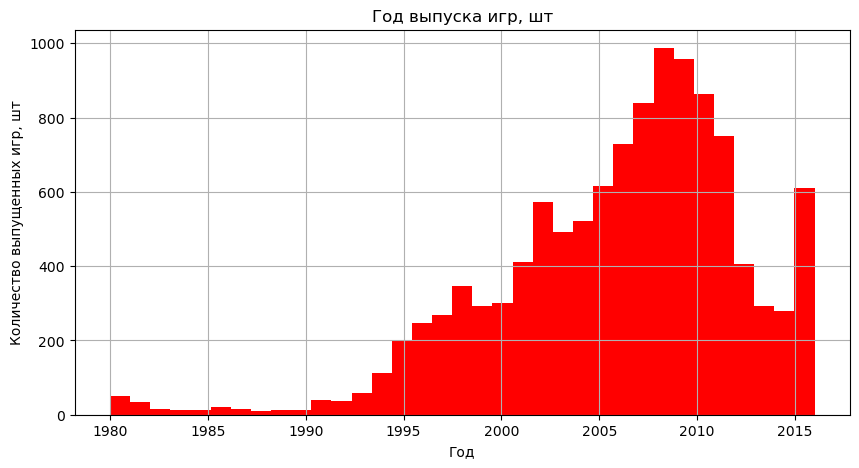

In [43]:
data.hist(column = 'year_of_release',bins= 35,color = 'red',range=[1980,2016],figsize = [10,5])
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр, шт')
plt.title('Год выпуска игр, шт');

Исследовав гистограмму, можно сказать, что с 1991 года количество выпускаемых игр стремительно растет. Пик был в 2008-2009 годах, было выпущено почти 1000 игр в каждый из этих годов. В 2014-2015 гг наблюдается значительный провал в выпуске игр, но в 2016 г. любители игр снова были обрадованы новыми поступлениями.

##### Продажи

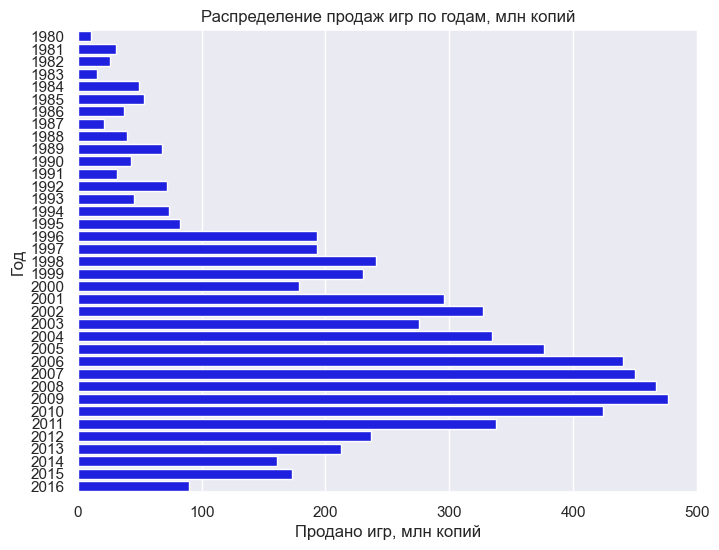

In [44]:
sb.set(rc = {'figure.figsize':(8,6)})
sales = data.groupby('year_of_release')['total_sales'].sum().reset_index()
ax = sb.barplot(x='total_sales',
            y='year_of_release',
            color = 'blue',
            data=sales,
            orient = 'h')
ax.set_title('Распределение продаж игр по годам, млн копий')
ax.set(xlabel='Продано игр, млн копий', ylabel='Год');

Как видно из полученного графика, наибольшее количество проданных копий игр приходится на период 2006-2009 гг. Заметим, что прирост в количестве проданных копий наблюдается до 2010 г., далее продажи пошли на спад. Стоит также отметить, что данные за 2016 г. могут быть неполными, а значит количество продаж игр может в нём увеличится по сравнению с предыдущими годами.

##### Платформы с наибольшими суммарными продажами и  распределение по годам

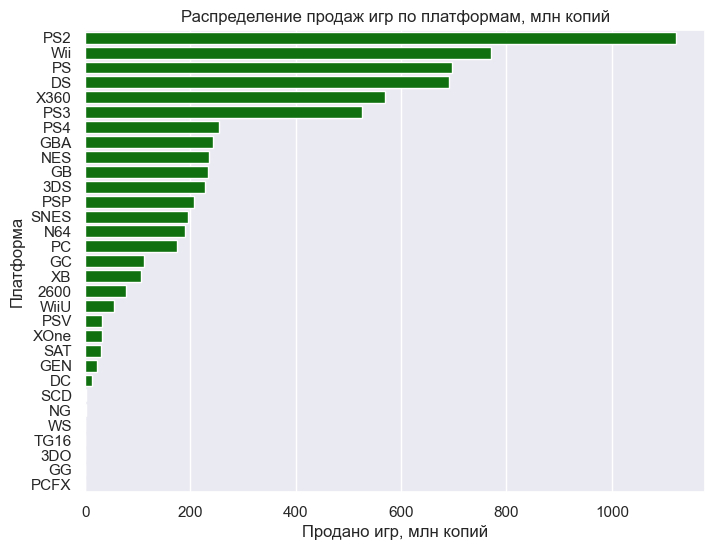

In [45]:
sb.set(rc = {'figure.figsize':(8,6)})
platform_sales = data.groupby('platform')['total_sales']\
                .sum().reset_index()\
                .sort_values(by='total_sales',ascending=False)
ax = sb.barplot(x='total_sales',
            y='platform',
            color = 'green',
            data=platform_sales,
            orient = 'h')
ax.set_title('Распределение продаж игр по платформам, млн копий')
ax.set(xlabel='Продано игр, млн копий', ylabel='Платформа');

На основании гистограммы можно сделать вывод, что наибольшее количество продаж было на платформах "PS2","Wii","PS" и "DS". Именно эти платформы имели наибольшие суммарные продажи за весь доступный период (с 1980 по 2016). 
<p>Посмотрим на продажи для 5 наиболее крупных платформ по годам:

In [46]:
platforms = ['PS','X360','Wii','PS2','DS']
data_main_platforms = data[(data['platform'] == 'PS') | (data['platform'] == 'X360') | (data['platform'] == 'Wii') | (data['platform'] == 'PS2')  | (data['platform'] == 'DS') ]
data_main_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_filtered,total_sales,year_count,platform_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,sports,82.54,28.0,132.53
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,mariokart,35.52,215.0,145.65
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,sportsresort,32.77,245.0,183.47
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,neupermariobros,29.80,171.0,111.81
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,play,28.91,28.0,132.53


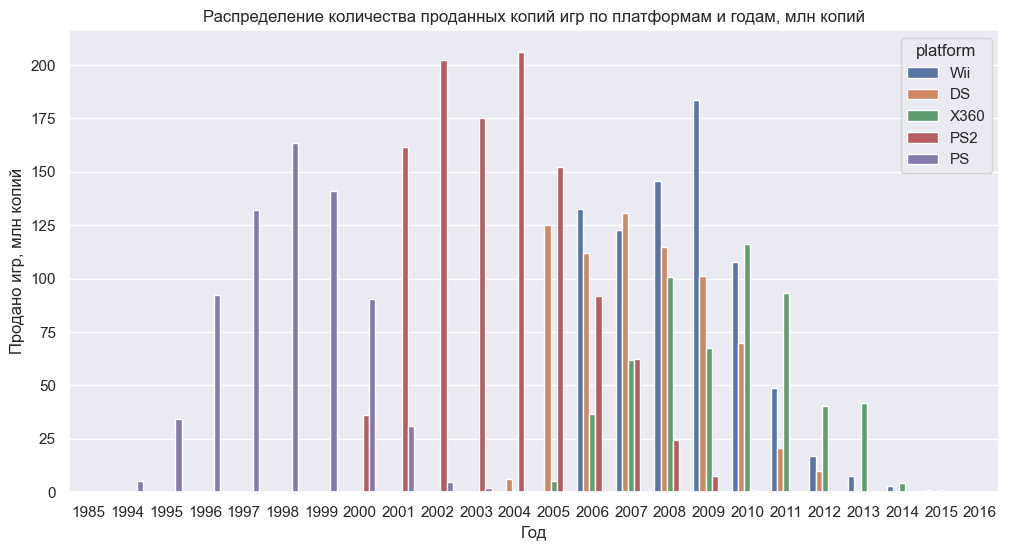

In [47]:
sb.set(rc = {'figure.figsize':(12,6)})
kopies = sb.barplot(x='year_of_release',
            y='platform_sales',
            hue="platform",
            data=data_main_platforms)
kopies.set_title('Распределение количества проданных копий игр по платформам и годам, млн копий')
kopies.set(xlabel='Год', ylabel='Продано игр, млн копий');

Как видно из полученного графика наиболее крупные платформы, имеющие наибольшее количество продаж игр к 2016 году утратили свою популярность. Соответственно, ни одна из этих платформ не можт быть использована для дальнейшего анализа игровой индустрии и формирования прогноза на 2017 г.

##### Характерный срок появления и исчезновения платформ
Подсчитаем количество лет, в течение которых на платформах появлялись новые игры. Найдём среднее и медиану для данного показателя.

In [48]:
data_lifecycle = []

for platform in data['platform'].unique():
    platform_lifecycle = []
    for year in data[data['platform'] == platform]['year_of_release']:
        if year not in platform_lifecycle:
            platform_lifecycle.append(year)
    data_lifecycle.append(len(platform_lifecycle))

lifecycle = pd.DataFrame({'platform': data['platform'].unique(),'platform_lifecycle': data_lifecycle})
lifecycle.sort_values(by ='platform_lifecycle', ascending = False).head(10)

,platform,platform_lifecycle
14,PC,25
2,GB,12
4,X360,12
6,PS2,12
16,PSP,12
1,NES,12
0,Wii,11
3,DS,11
5,PS3,11
12,PS,10


In [49]:
display(f'Средний "срок жизни" игровой платформы: {round(lifecycle["platform_lifecycle"].mean())} лет')
display(f'Медиана "срока жизни" игровой платформы: {round(lifecycle["platform_lifecycle"].median())} лет')

'Средний "срок жизни" игровой платформы: 7 лет'

'Медиана "срока жизни" игровой платформы: 6 лет'

Таким образом средний срок, в течение которого на платформе продолжают выходить новые игры - около 6-7 лет.

На основании полученных данных можно сделать вывод, что актуальным периодом для анализа игровых платформ будет отрезок времени с 2013 года, поскольку средний срок актуальности платформы - 6-7 лет, соответственно платформы, имеющие потенциал развития в ближайшие несколько лет - те, которые вышли после 2013 года, т.е. имеют еще как минимум 3 года потенциального развития.

In [50]:
data_sorted = data[data['year_of_release'] >= 2013].reset_index()

##### Продажи по платформам

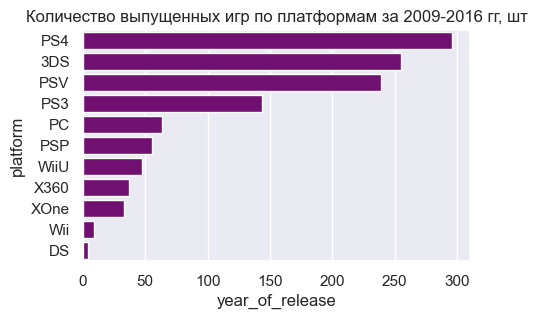

In [51]:
sb.set(rc = {'figure.figsize':(5,3)})
platform_releases = data_sorted.groupby('platform')['year_of_release'].count().reset_index()
sb.barplot(x='year_of_release', y='platform',
           data=platform_releases, 
           color='purple',
           order=platform_releases.sort_values('year_of_release',ascending=False).platform)
plt.title('Количество выпущенных игр по платформам за 2009-2016 гг, шт')
plt.show();

Как видно из полученной гистограммы, наибольшее количество игр было выпущено на платформах 'DS' и 'PS3'. Также одними из наиболее популярных платформ для выпуска игр стали PC, Wii, PSP и 3DS.

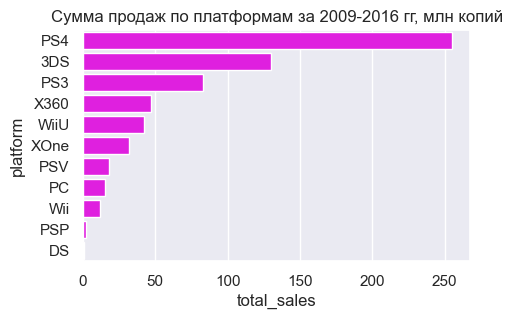

In [52]:
platform_copies = data_sorted.groupby('platform')['total_sales'].sum().reset_index()
sb.barplot(x='total_sales', 
           y='platform', 
           color='magenta',
          data = platform_copies,
          order=platform_copies.sort_values('total_sales',ascending=False).platform)
plt.title('Сумма продаж по платформам за 2009-2016 гг, млн копий');

Судя по полученному графику, наибольшее количество проданных копий во всех регионах было получена на платформах 'PS4' и '3DS', 'PS3'. Интересно, что несмотря на большое количество игр, выпущенных на платформе 'PSV', копий этих игр было продано не так много, как, например, на 'PS3', где игр было выпущено меньше. Это может свидетельствовать о непопулярности платформы, а также о её устаревании.

<b>Рассмотрим динамику выпуска игр и количества проданных копий игр на нескольких наиболее крупных платформах:</b>
<p>- PS4
<p>- 3DS
<p>- PS3
<p>- PSV
<p>- PC

Ещё раз отсортируем данные, оставим только крупные платформы, необходимые для анализа.

In [53]:
platforms = ['PS4','PS3','3DS','PSV','PC']
data_main_platforms = data_sorted[(data_sorted['platform'] == 'PS3') | (data_sorted['platform'] == 'PSV') | (data_sorted['platform'] == 'PS4') | (data_sorted['platform'] == 'PC') | (data_sorted['platform'] == '3DS') ]
data_main_platforms.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_filtered,total_sales,year_count,platform_sales
0,16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,grandtheftautov,21.05,79.0,71.67
1,30,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,callofduty:blacko3,14.63,102.0,110.93
2,32,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,pokemonx/pokemony,14.60,70.0,50.33
3,42,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,pokemonomegaruby/pokemonalphasapphire,11.68,68.0,40.20
6,68,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,fifa16,8.58,102.0,110.93


Построим гистограммы, отражающие количество выпущенных игр и сумму проданных копий для данных платформ за период 2009-2016гг

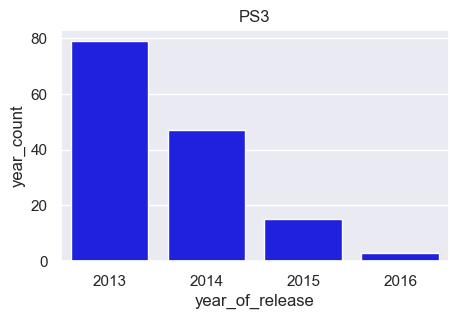

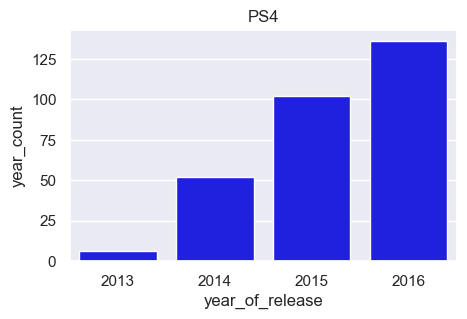

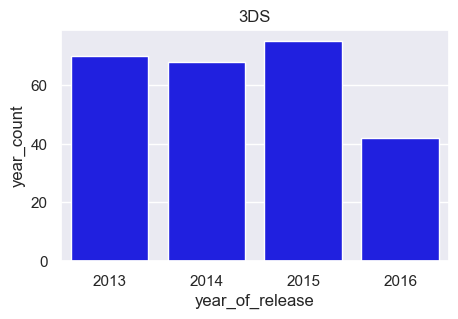

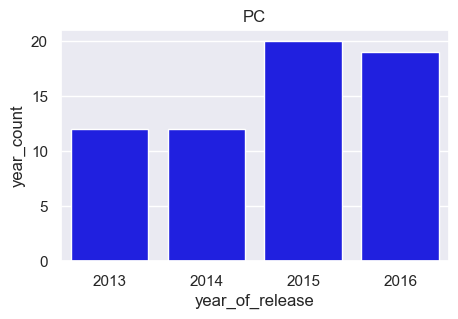

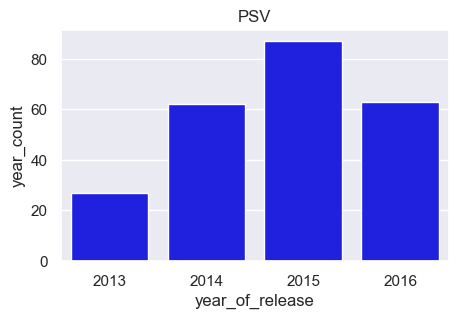

In [54]:
for platform in data_main_platforms['platform'].unique():
    ax = sb.barplot(x='year_of_release',
        y='year_count',
        color = 'blue',
        data=data_main_platforms[data_main_platforms['platform'] == platform])
    plt.title(platform)
    plt.show()

Как видно из полученных гистограмм, несмотря на большое количество выпущенных игр на платформе PS3 среди других платформ, популярность этой платформы снижается с течением времени, к 2016 году игры на ней почти не выпускаются.
<p>Обратная тенденция наблюдается для платформы PS4. Появившись в 2013 г., к 2016 г. она уже стала наиболее популярной для выпуска новых игр. Остальные представленные платформы показывают примерно одинаковые значения, на них игры в изучаемый промежуток времени выпускаются стабильно.

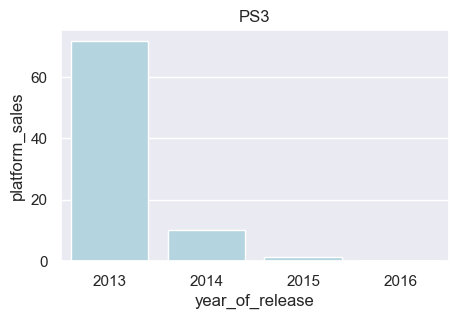

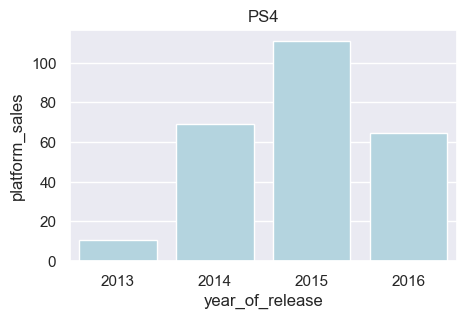

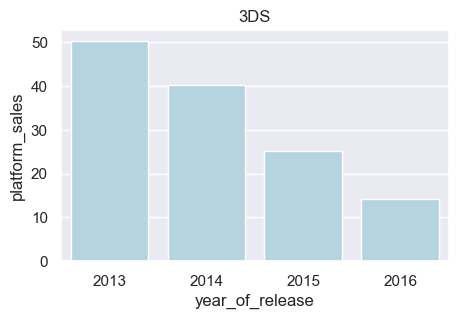

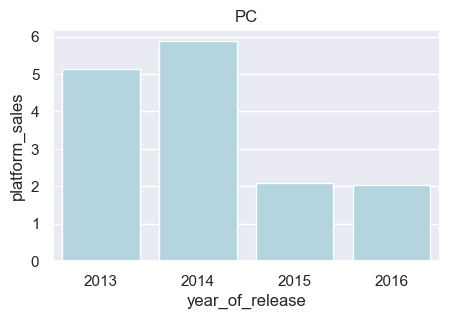

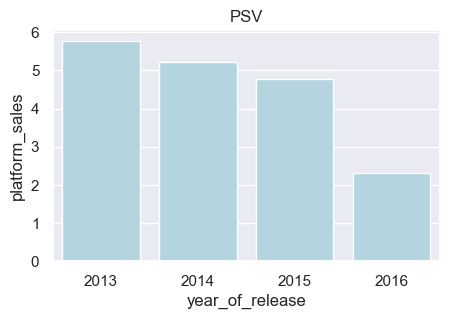

In [55]:
for platform in data_main_platforms['platform'].unique():
    ax = sb.barplot(x='year_of_release',
        y='platform_sales',
        color = 'lightblue',
        data=data_main_platforms[data_main_platforms['platform'] == platform])
    plt.title(platform)
    plt.show()

Что касается проданных копий, то, аналогично с предыдущим графиком, несмотря на занимаемые высокие позиции среди самых попцлярных платформ, платформа PS3 показывает отрицательную тенденцию.
<p>Интересно, что несмотря на стабильно равное количество выпускаемых игр за изучаемый период, платформы PC, 3DS и PSV показывают отрицательный тренд в продажах. Скорее всего, их популярность снижается, хоть и незначительно.
<p>Отдельно стоит отметить платформу PS4, которая, аналогично с количеством выпускаемых игр, показывает положительную тенденцию в продажах.

#### Вывод

Таким образом, на основании данных, полученных в результате анализа различных игровых платформ за период 2013-2016гг, можно сделать вывод, что наиболее потенциально выгодной платформой является PS4. Также стоит отметить платформы PC и PSV, которые не имеет положительных тенденций к росту, однако, скорее всего, будут присутствовать на рынке еще несколько лет.

#### Изучим глобальные продажи игр (количество проданных копий)

Сгруппируем данные по платформам:

In [56]:
sales_data = data_sorted.groupby(['platform'])['total_sales'].sum().reset_index().head()
sales_data

,platform,total_sales
0,3DS,130.10
1,DS,0.54
2,PC,15.12
3,PS3,83.23
4,PS4,255.01


Найдём среднее и медиану количества проданных копий по платформам

In [57]:
print(f"Среднее значение количества проданных копий по всем платформам, копий: {data_sorted['total_sales'].mean() * 1000000}")
print(f"Медиана количества проданных копий по всем платформам, копий: {data_sorted['total_sales'].median()* 1000000}")

Среднее значение количества проданных копий по всем платформам, копий: 538891.7089678443
Медиана количества проданных копий по всем платформам, копий: 90000.0


Построим "ящик с усами" общего количества проданных копий в течение всего периода

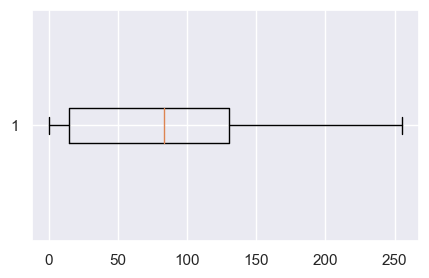

In [58]:
plt.boxplot(sales_data['total_sales'], vert = False);

In [59]:
sales_data['total_sales'].describe()

count      5.000000
mean      96.800000
std      102.787462
min        0.540000
25%       15.120000
50%       83.230000
75%      130.100000
max      255.010000
Name: total_sales, dtype: float64

Как видно из полученного графика, можно сделать вывод, что в среднем было около 96 млн продаж на платформе.

При этом с низкими продажами можно считать те платформы, которые продали менее 15 млн копий игр. А крупными те, которые продали более 130 млн копий.

Самая крупная платформа при этом продала 255 млн копий. Данное значение, скорее всего, принадлежит наиболее крупной платформе - PS4.

#### Влияние оценок игр на их продажи
<p> Оценка влияния отзывов критиков и пользователей на продажи игр будет проводиться в рамках наиболее перспективной по результатам анализа) платформы - PS4.

##### Влияние оценки критиков на продажи игр
Для этого найдём коэффициент Пирсона для столбцов "Оценка критиков"(critic_score) и "Общие продажи"(total_sales)

In [60]:
data_sorted[data_sorted['platform'] == 'PS4']['critic_score'].corr(data['total_sales'])

0.42233705573941677

И построим диаграмму рассеяния

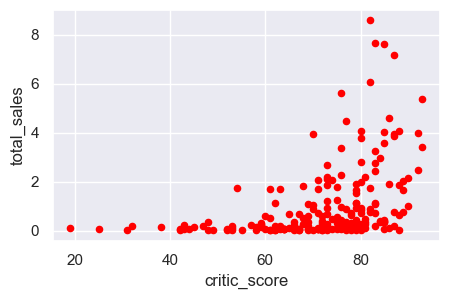

In [61]:
data_sorted[data_sorted['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter',color = 'red');

Связь между двумя этими показателями очень слабая. Действительно, на количество проданных копий влияют гораздо более существенные факторы, такие как стоимость, популрность игры и платформы и т.п. Поэтому оценка критиков не оказывает значимого влияния на продажи игр.

##### Влияние оценки пользователей на продажи игр
Для этого найдём коэффициент Пирсона для столбцов "Оценка пользователей"(user_score) и "Общие продажи"(total_sales)

In [62]:
data_sorted[data_sorted['platform'] == 'PS4']['user_score'].corr(data['total_sales'])

-0.04860529357853044

И построим диаграмму рассеяния

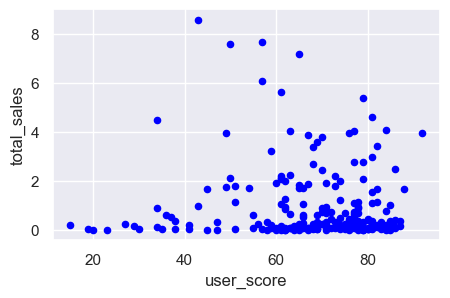

In [63]:
data_sorted[data_sorted['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter',color = 'blue');

Коэффициент Пирсона составляет около 5% - это означает, что связь между оценками пользователей и количеством проданных копий игр отсутствует. Это может объяснятся тем, что, как и с отзывами критиков, оценка пользоватлей не является ключевым фактором, влияющим на решение пользовователя о покупке игры. Также, при наличии профессиональной оценки, пользовательское мнение о игре имеет ещё меньшее влияние.

##### Влияние оценки пользователей и критиков на продажи игр на других платформах
Посмотрим данные показатели для других крупных платформ актульного периода.

<b>3DS

In [64]:
data_sorted[data_sorted['platform'] == '3DS']['critic_score'].corr(data['total_sales'])

0.3691428038611955

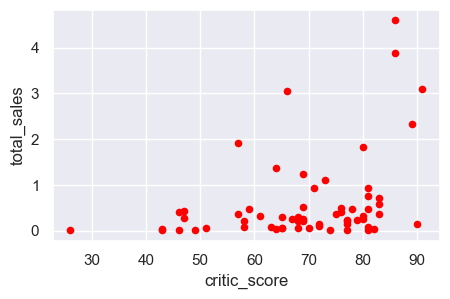

In [65]:
data_sorted[data_sorted['platform'] == '3DS'].plot(x='critic_score', y='total_sales', kind='scatter',color = 'red');

Коэффициент Пирсона составляет около 37% - это означает, что cвязь между двумя этими показателями очень слабая.

In [66]:
data_sorted[data_sorted['platform'] == '3DS']['user_score'].corr(data['total_sales'])

0.26269975375934507

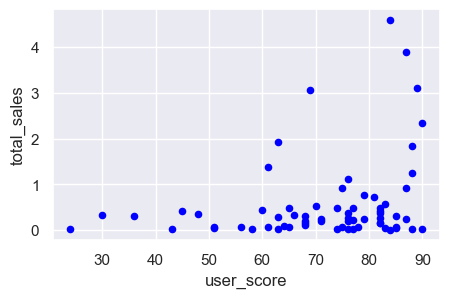

In [67]:
data_sorted[data_sorted['platform'] == '3DS'].plot(x='user_score', y='total_sales', kind='scatter',color = 'blue');

Коэффициент Пирсона составляет около 26% - это означает, что cвязь между двумя этими показателями почти отсутствует.

<b>DS

In [68]:
data_sorted[data_sorted['platform'] == 'DS']['critic_score'].corr(data['total_sales'])

nan

В датасете отсутствуют данные об оценке критиками игр на данной платформе.

In [69]:
data_sorted[data_sorted['platform'] == 'DS']['user_score'].corr(data['total_sales'])

nan

В датасете отсутствуют данные об оценке пользователями игр на данной платформе.

<b>PC

In [70]:
data_sorted[data_sorted['platform'] == 'PC']['critic_score'].corr(data['total_sales'])

0.19508854025881653

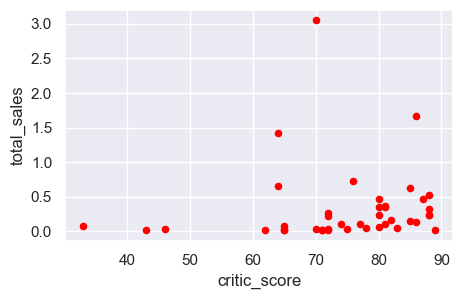

In [71]:
data_sorted[data_sorted['platform'] == 'PC'].plot(x='critic_score', y='total_sales', kind='scatter',color = 'red');

Коэффициент Пирсона составляет около 19% - это означает, что cвязь между двумя этими показателями почти отсутствует.

In [72]:
data_sorted[data_sorted['platform'] == 'PC']['user_score'].corr(data['total_sales'])

-0.30728832678563406

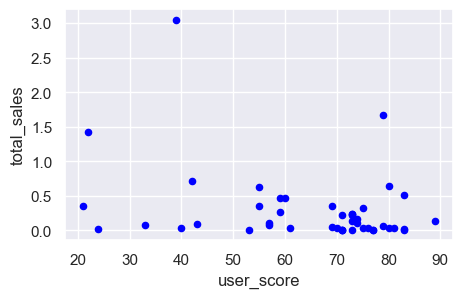

In [73]:
data_sorted[data_sorted['platform'] == 'PC'].plot(x='user_score', y='total_sales', kind='scatter',color = 'blue');

Коэффициент Пирсона составляет около 30% - это означает, что cвязь между двумя этими показателями очень слабая.

<b>PS3

In [74]:
data_sorted[data_sorted['platform'] == 'PS3']['critic_score'].corr(data['total_sales'])

0.4150143876535772

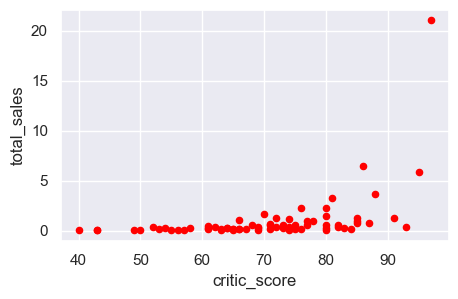

In [75]:
data_sorted[data_sorted['platform'] == 'PS3'].plot(x='critic_score', y='total_sales', kind='scatter',color = 'red');

Коэффициент Пирсона составляет около 42% - это означает, что cвязь между двумя этими показателями очень слабая.

In [76]:
data_sorted[data_sorted['platform'] == 'PS3']['user_score'].corr(data['total_sales'])

0.12330592671263933

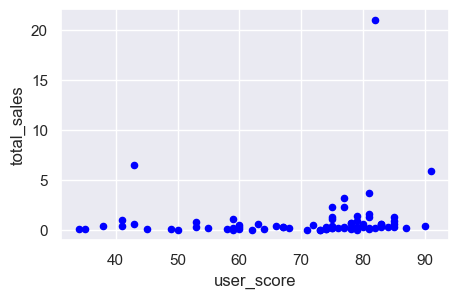

In [77]:
data_sorted[data_sorted['platform'] == 'PS3'].plot(x='user_score', y='total_sales', kind='scatter',color = 'blue');

Коэффициент Пирсона составляет около 12% - это означает, что cвязь между двумя этими показателями почти отсутствует.

##### Вывод
Таким образом, ни оценка критиков, ни оценка пользователей не оказывают сколько-нибудь существеного влияния на количество проданных копий игр. Основная причина, скорее всего, - незначимость данных факторов по сравнению с другими, более существенными моментами, на которые пользователи обращают внимание при покупке игры.
<p>На других платформах видна похожая ситуация, отзывы критиков и пользователей почти не влияют на продажи, поскольку на последние, в первую очередь, влияет популярность платформы, удобство её использования. Соответственно, если количество проданных копий игр на платформе низкое, то, скорее всего, дело в непопулярности платформы, а не оценке самой игры.

#### Распределение игр по жанрам

Посмотрим на распределение игр по жанрам: количестве выпущенных игр, продаж. Для этого создадим сводную таблицу с данными параметрами.

In [78]:
genre_data = data_sorted.pivot_table(index='genre', values = 'total_sales', aggfunc = ['count','mean']).round(2).reset_index()
genre_data.columns=('genre', 'games', 'sales')
genre_data.sort_values(by='sales',ascending=False)

,genre,games,sales
8,Shooter,72,1.77
10,Sports,74,0.98
6,Racing,34,0.91
4,Platform,36,0.84
7,Role-Playing,176,0.59
2,Fighting,43,0.52
0,Action,381,0.45
9,Simulation,47,0.40
3,Misc,99,0.35
5,Puzzle,12,0.25


Построим гистограмму по количеству выпущенных игр в каждом жанре:

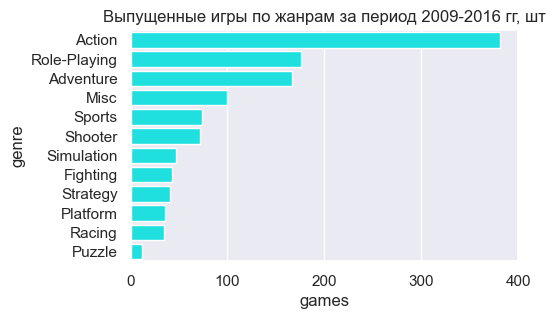

In [79]:
sb.barplot(x='games', 
           y='genre',
           color='cyan',
           data=genre_data,
           order=genre_data.sort_values('games',ascending=False).genre)
plt.title('Выпущенные игры по жанрам за период 2009-2016 гг, шт');

Как видно из графика, наибольшее количество выпущенных игр приходится на экшн-игры. За ними следуют приключенческие и 'misc'-игры. Наименьшее количество игр было выпущено в жанре паззлов.

А также построим гистограмму по количеству проданных копий игр в среднем по жанру:

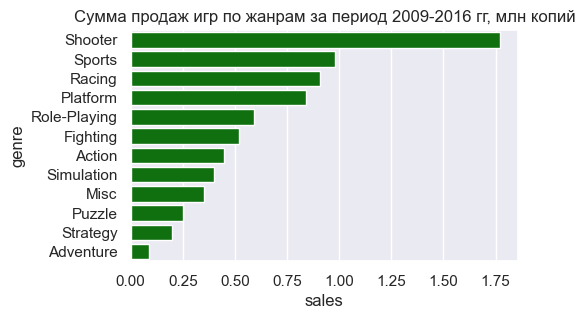

In [80]:
sb.barplot(x='sales', 
           y='genre',
           color='green',
           data=genre_data,
           order=genre_data.sort_values('sales',ascending=False).genre)
plt.title('Сумма продаж игр по жанрам за период 2009-2016 гг, млн копий');

Если смотреть на средние продажи, то, в отличие от количества выпускаемых игр в каждом жанре, лидируют шутеры, а экшн-игры находятся даже не на втором месте. 

### Портрет пользователя региона

#### Портрет пользователя из Северной Америки

##### Самые популярные платформы
Найдём наиболее популярные платформы в регионе. Для этого подсчитаем количество продаж для каждой платформы и выделим топ-5.

In [81]:
platforms_na = data_sorted[data_sorted['na_sales'].isna() == False].groupby(\
    ['platform'])['na_sales']\
    .sum().reset_index()\
    .sort_values(by='na_sales',ascending=False)
platforms_na.head()

,platform,na_sales
4,PS4,87.47
0,3DS,34.28
9,X360,30.81
3,PS3,25.54
10,XOne,18.66


Также найдем доли продаж для каждой платформы в данном регионе.

In [82]:
for i in range(len(platforms_na)):
    platforms_na.loc[i,'sales_persentage'] = round((platforms_na.loc[i,'na_sales'] / platforms_na['na_sales'].sum() * 100),2)
platforms_na.head()

,platform,na_sales,sales_persentage
4,PS4,87.47,38.54
0,3DS,34.28,15.11
9,X360,30.81,13.58
3,PS3,25.54,11.25
10,XOne,18.66,8.22


Построим круговую диаграмму по полученным данным

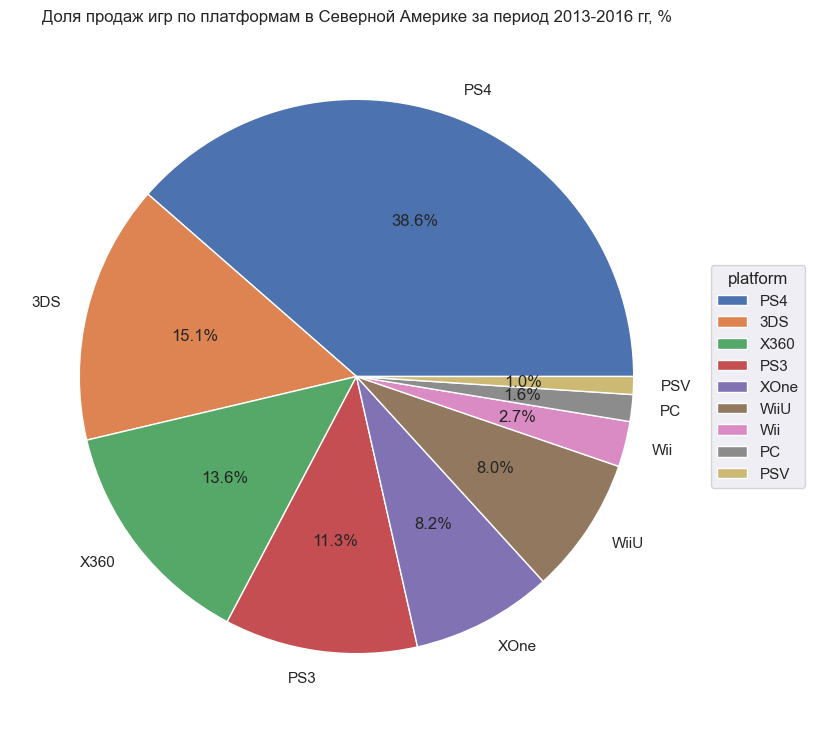

In [83]:
plt.figure(figsize=(9, 9))
plt.pie(platforms_na[platforms_na['sales_persentage'] > 1 ]['sales_persentage'], labels = platforms_na[platforms_na['sales_persentage'] > 1]['platform'],autopct='%1.1f%%')
plt.legend(platforms_na['platform'],
          title ="platform",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title('Доля продаж игр по платформам в Северной Америке за период 2013-2016 гг, %');

На основе полученных результатов можно сделать вывод, что наиболее популярные платформы в Северной Америке в основном совпадают  с таковыми в мире. 5-ку наиболее популярных платформ составляют те же, что и в мире.

##### Самые популярные жанры
Найдём наиболее популярные жанры в регионе. Для этого подсчитаем количество продаж для каждого жанра и выделим топ-5.

In [84]:
genres_na = data_sorted[data_sorted['na_sales'].isna() == False].groupby(\
    ['genre'])['na_sales']\
    .sum().reset_index()\
    .sort_values(by='na_sales',ascending=False)
genres_na.head()

,genre,na_sales
0,Action,57.12
8,Shooter,55.67
7,Role-Playing,29.75
10,Sports,27.39
3,Misc,14.46


Также найдем доли продаж для каждой платформы в данном регионе.

In [85]:
for i in range(len(genres_na)):
    genres_na.loc[i,'sales_persentage'] = round((genres_na.loc[i,'na_sales'] / genres_na['na_sales'].sum() * 100),2)
genres_na.head()

,genre,na_sales,sales_persentage
0,Action,57.12,25.17
8,Shooter,55.67,24.53
7,Role-Playing,29.75,13.11
10,Sports,27.39,12.07
3,Misc,14.46,6.37


Построим круговую диаграмму по полученным данным

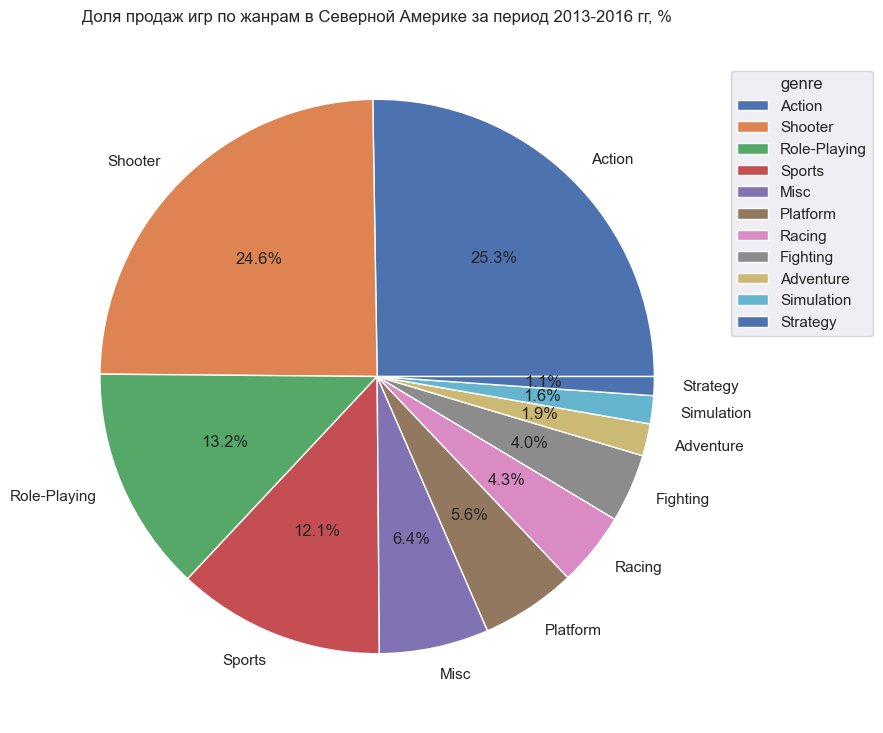

In [86]:
plt.figure(figsize=(9, 9))
plt.pie(genres_na[genres_na['sales_persentage'] > 1]['sales_persentage'], labels = genres_na[genres_na['sales_persentage'] > 1]['genre'],autopct='%1.1f%%')
plt.legend(genres_na['genre'],
          title ="genre",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1.5))
plt.title('Доля продаж игр по жанрам в Северной Америке за период 2013-2016 гг, %');

На основе полученных результатов можно сделать вывод, что наиболее популярные жанры также примерно совпадают с мировыми тенденциями. Наиболее популярными жанрами игр являются экшн-игры, шутеры и спортивные игры.

#### Влияние рейтинга ESRB на продажи в отдельном регионе
Для этого построим диаграмму рассеяния. Данные категориальны, поэтому коэффициент Пирсона вычислять не будем.

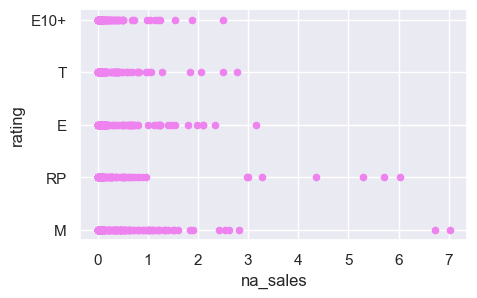

In [87]:
data_sorted[data_sorted['na_sales'].isna() == False].plot(x='na_sales', y='rating', kind='scatter',color = 'violet');

Как видно из полученного графика, большинство игр имеет рейтинг 'E' и 'M' - разрешенные для всех возрастов и для подростков соответственно. Из этого можно сделать вывод, что большую часть продаж составляют детские и подростковые игры. Данные похожи на соответствующие реальности.

#### Портрет пользователя из Европы

##### Самые популярные платформы
Найдём наиболее популярные платформы в регионе. Для этого подсчитаем количество продаж для каждой платформы и выделим топ-5.

In [88]:
platforms_eu = data_sorted[data_sorted['eu_sales'].isna() == False].groupby(\
    ['platform'])['eu_sales']\
    .sum().reset_index()\
    .sort_values(by='eu_sales',ascending=False)
platforms_eu.head()

,platform,eu_sales
4,PS4,115.48
3,PS3,30.73
0,3DS,27.13
9,X360,12.24
8,WiiU,12.23


Также найдем доли продаж для каждой платформы в данном регионе.

In [89]:
for i in range(len(platforms_na)):
    platforms_eu.loc[i,'sales_persentage'] = round((platforms_eu.loc[i,'eu_sales'] / platforms_eu['eu_sales'].sum() * 100),2)
platforms_eu.head()

,platform,eu_sales,sales_persentage
4,PS4,115.48,51.25
3,PS3,30.73,13.64
0,3DS,27.13,12.04
9,X360,12.24,5.43
8,WiiU,12.23,5.43


Построим круговую диаграмму по полученным данным

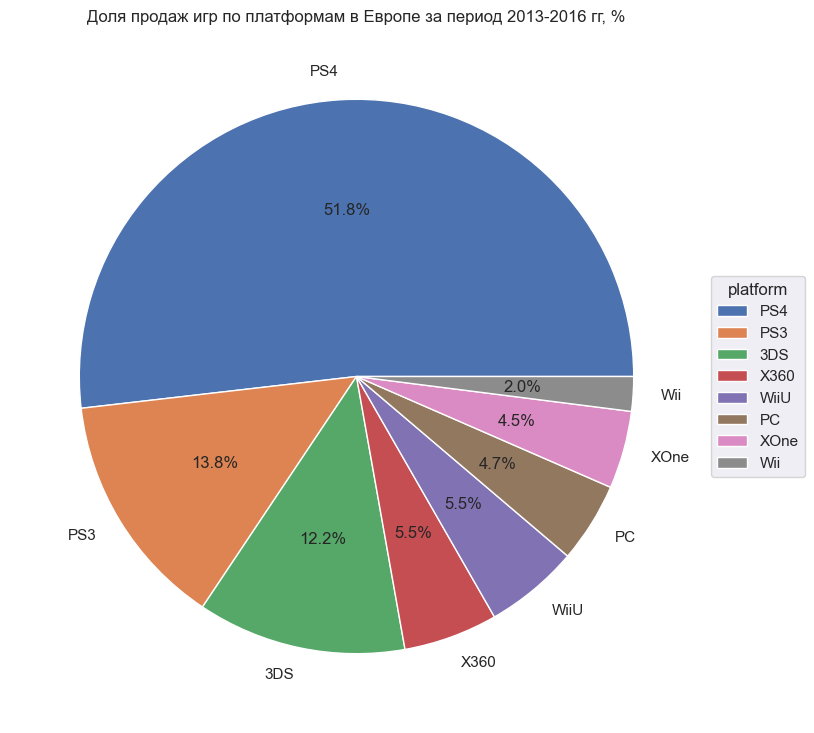

In [90]:
plt.figure(figsize=(9, 9))
plt.pie(platforms_eu[platforms_eu['sales_persentage'] > 1]['sales_persentage'], labels = platforms_eu[platforms_eu['sales_persentage'] > 1]['platform'],autopct='%1.1f%%')
plt.legend(platforms_eu['platform'],
          title ="platform",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title('Доля продаж игр по платформам в Европе за период 2013-2016 гг, %');

На основе полученных результатов можно сделать вывод, что наиболее популярные платформы в Европе совпадают, в целом, с таковыми в мире. Едиственное отличие - популярность платформы PS3 (по сравнению с 3DS во всем мире), а также, наоборот, непопулярности платформы X360, которая является одним из лидеров в мировом масштабе. 

##### Самые популярные жанры
Найдём наиболее популярные жанры в регионе. Для этого подсчитаем количество продаж для каждого жанра и выделим топ-5.

In [91]:
genres_eu = data_sorted[data_sorted['eu_sales'].isna() == False].groupby(\
    ['genre'])['eu_sales']\
    .sum().reset_index()\
    .sort_values(by='eu_sales',ascending=False)
genres_eu.head()

,genre,eu_sales
0,Action,60.11
8,Shooter,49.56
10,Sports,31.04
7,Role-Playing,24.31
6,Racing,15.34


Также найдем доли продаж для каждой платформы в данном регионе.

In [92]:
for i in range(len(genres_eu)):
    genres_eu.loc[i,'sales_persentage'] = round((genres_eu.loc[i,'eu_sales'] / genres_eu['eu_sales'].sum() * 100),2)
genres_eu.head()

,genre,eu_sales,sales_persentage
0,Action,60.11,26.68
8,Shooter,49.56,21.99
10,Sports,31.04,13.77
7,Role-Playing,24.31,10.79
6,Racing,15.34,6.81


Построим круговую диаграмму по полученным данным

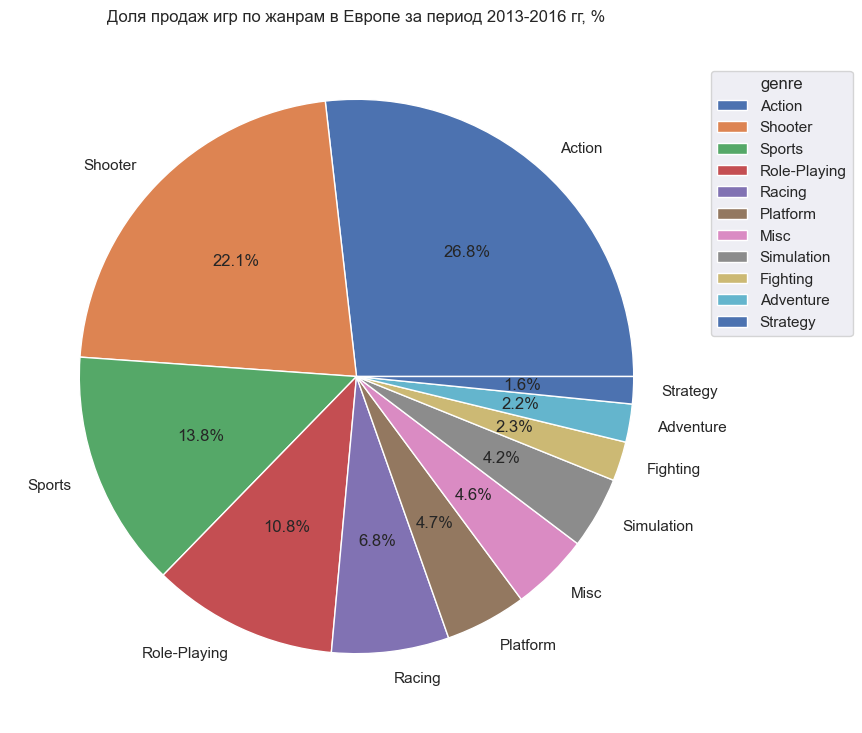

In [93]:
plt.figure(figsize=(9, 9))
plt.pie(genres_eu[genres_eu['sales_persentage'] > 1]['sales_persentage'], labels = genres_eu[genres_eu['sales_persentage'] > 1]['genre'],autopct='%1.1f%%')
plt.legend(genres_eu['genre'],
          title ="genre",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1.5))
plt.title('Доля продаж игр по жанрам в Европе за период 2013-2016 гг, %');

На основе полученных результатов можно сделать вывод, что наиболее популярные жанры также примерно совпадают с мировыми тенденциями и полностью совпадают с таковыми в Северной Америке.

#### Влияние рейтинга ESRB на продажи в отдельном регионе
Для этого построим диаграмму рассеяния. Данные категориальны, поэтому коэффициент Пирсона вычислять не будем.

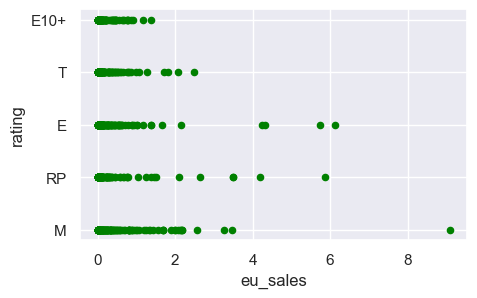

In [94]:
data_sorted[data_sorted['eu_sales'].isna() == False].plot(x='eu_sales', y='rating', kind='scatter',color = 'green');

Как видно из полученного графика, многие игры не имеют рейтинга (значение 'RP'), а также основная часть купленных игр имели рейтинг 'E' и 'M' - разрешенные для всех возрастов и для подростков соответственно. Данные почти полностью совпадают с результатами анализа этой зависимости в Северной Америке, а также во всем мире.

#### Портрет пользователя из Японии

##### Самые популярные платформы
Найдём наиболее популярные платформы в регионе. Для этого подсчитаем количество продаж для каждой платформы и выделим топ-5.

In [95]:
platforms_jp = data_sorted[data_sorted['jp_sales'].isna() == False].groupby(\
    ['platform'])['jp_sales']\
    .sum().reset_index()\
    .sort_values(by='jp_sales',ascending=False)
platforms_jp.head()

,platform,jp_sales
0,3DS,63.08
3,PS3,14.55
4,PS4,12.71
6,PSV,12.20
8,WiiU,8.82


Также найдем доли продаж для каждой платформы в данном регионе.

In [96]:
for i in range(len(platforms_na)):
    platforms_jp.loc[i,'sales_persentage'] = round((platforms_jp.loc[i,'jp_sales'] / platforms_jp['jp_sales'].sum() * 100),2)
platforms_jp.head()

,platform,jp_sales,sales_persentage
0,3DS,63.08,55.37
3,PS3,14.55,12.77
4,PS4,12.71,11.16
6,PSV,12.20,10.71
8,WiiU,8.82,7.74


Построим круговую диаграмму по полученным данным

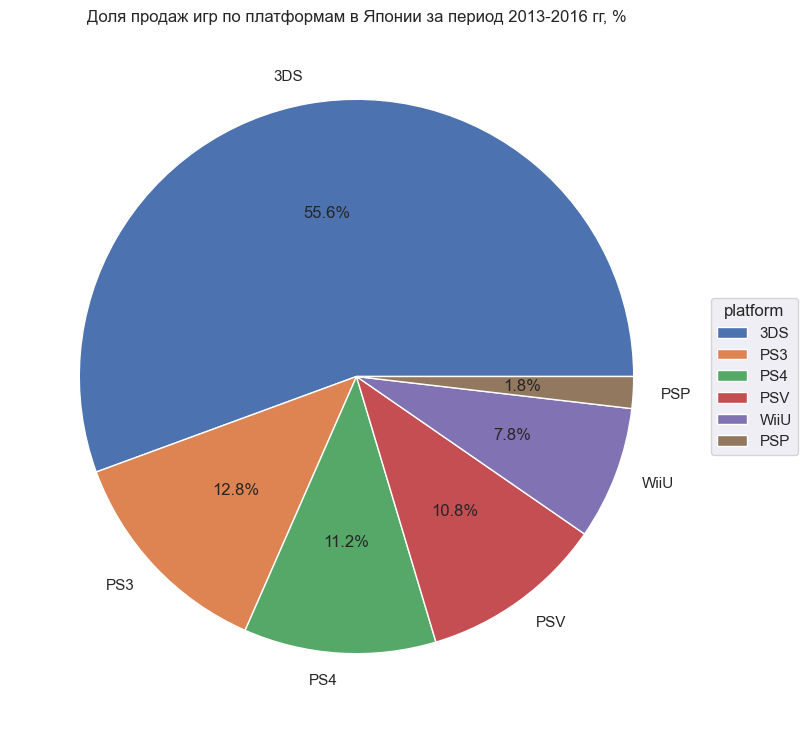

In [97]:
plt.figure(figsize=(9, 9))
plt.pie(platforms_jp[platforms_jp['sales_persentage'] > 1]['sales_persentage'], labels = platforms_jp[platforms_jp['sales_persentage'] > 1]['platform'],autopct='%1.1f%%')
plt.legend(platforms_jp['platform'],
          title ="platform",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title('Доля продаж игр по платформам в Японии за период 2013-2016 гг, %');

На основе полученных результатов можно сделать вывод, что наиболее популярные платформы в Европе не совсем совпадают с таковыми в мире. Основным отличием является популярность платформы 3DS, которая обычно находится 10-ке наиболее популярных платформ, но далеко не на первом месте. Также стоит отметить непопулярность платформы PS4, которая на момент формирования датасета являлась наиболее прогрессивной и инновационной. То же можно сказать и про платформу X360, которая в Северной Америка занимают лидирующую позицию, а в Японии находится почти на посленем месте по продажам. 
<p>В целом, стоит отметить, что Японцы, судя по продажам, предпочитают "мобильные" игровые устройства, поэтому большинство наиболее популярных в этом регионе платформ поддерживают именно такой формат игрового процесса.

##### Самые популярные жанры
Найдём наиболее популярные жанры в регионе. Для этого подсчитаем количество продаж для каждого жанра и выделим топ-5.

In [98]:
genres_jp = data_sorted[data_sorted['jp_sales'].isna() == False].groupby(\
    ['genre'])['jp_sales']\
    .sum().reset_index()\
    .sort_values(by='jp_sales',ascending=False)
genres_jp.head()

,genre,jp_sales
7,Role-Playing,41.94
0,Action,31.90
3,Misc,7.60
2,Fighting,5.84
8,Shooter,5.02


Также найдем доли продаж для каждой платформы в данном регионе.

In [99]:
for i in range(len(genres_jp)):
    genres_jp.loc[i,'sales_persentage'] = round((genres_jp.loc[i,'jp_sales'] / genres_jp['jp_sales'].sum() * 100),2)
genres_jp.head()

,genre,jp_sales,sales_persentage
7,Role-Playing,41.94,36.82
0,Action,31.90,28.00
3,Misc,7.60,6.67
2,Fighting,5.84,5.13
8,Shooter,5.02,4.41


Построим круговую диаграмму по полученным данным

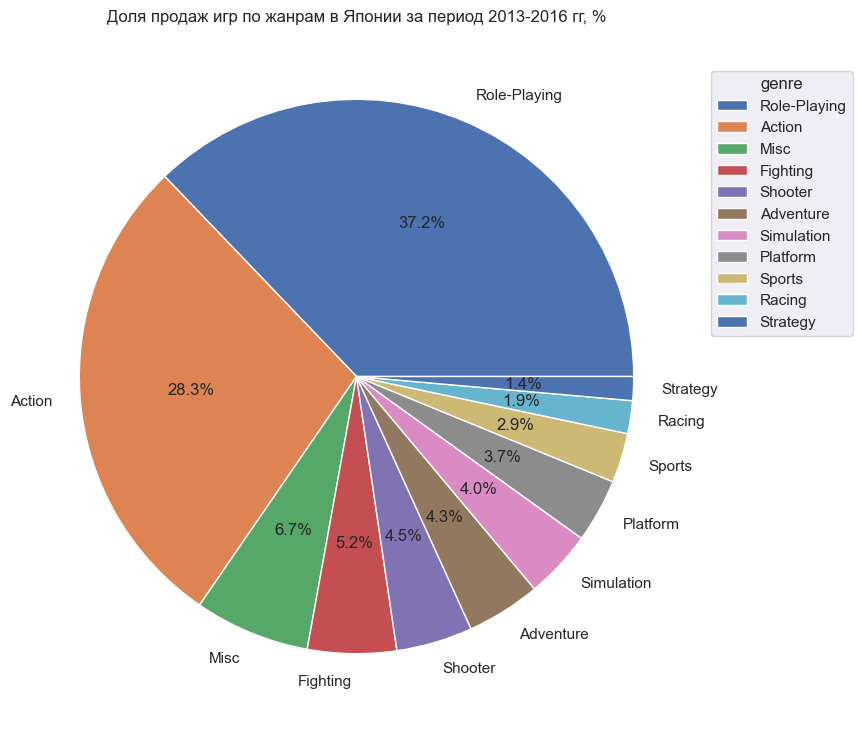

In [100]:
plt.figure(figsize=(9, 9))
plt.pie(genres_jp[genres_jp['sales_persentage'] > 1]['sales_persentage'], labels = genres_jp[genres_jp['sales_persentage'] > 1]['genre'],autopct='%1.1f%%')
plt.legend(genres_jp['genre'],
          title ="genre",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1.5))
plt.title('Доля продаж игр по жанрам в Японии за период 2013-2016 гг, %');

Похожая тенденция наблюдается и в распределении игровых жанров. В отличие от Европы и Америки, в Японии наиболее популярными являются ролевые игры, а экшн занимает только второе место. В остальном распределение жанров по популярности примерно совпадает с другими регионами и миром.

#### Влияние рейтинга ESRB на продажи в отдельном регионе
Для этого построим диаграмму рассеяния. Данные категориальны, поэтому коэффициент Пирсона вычислять не будем.

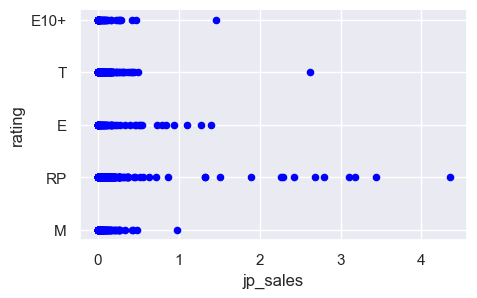

In [101]:
data_sorted[data_sorted['jp_sales'].isna() == False].plot(x='jp_sales', y='rating', kind='scatter',color = 'blue');

Как видно из полученного графика, многие игры не имеют рейтинга (значение 'RP'), а также основная часть купленных игр имели рейтинг 'E' и 'M' - разрешенные для всех возрастов и для подростков соответственно. Данные почти полностью совпадают с результатами анализа этой зависимости в Северной Америке, а также во всем мире.

#### Вывод
Таким образом, данные по продажам в Северной Америке и Европе почти совпадают по жанрам, однако наиболее популярные игровые платформы у них различаются. Это может быть связано с локализационными особнностями производства и продажи определённых электронных игровых устройств, которые, соответственно, поддерживают различные игровые платформы. В Японии же видно сильное различие с двумя другими регионами как по жанровым предпочтениям, так и по наиболее популярным игровым платформам. Данную особенность также, скорее всего, можно объяснить локализацией и культурными особенностями.

### Проверка гипотез

In [102]:
data_sorted = data_sorted[data_sorted['user_score'].isna() == False].reset_index()

#### Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;

<p><b>H_0:</b> Средний пользовательский рейтинг (user_score) платформы 'Xbox One' = Средний пользовательский рейтинг (user_score) платформы 'PC'`
<p><b>H_a:</b> Средний пользовательский рейтинг (user_score) платформы 'Xbox One' ≠ Средний пользовательский рейтинг (user_score) платформы 'PC'`
<p><b>alpha </b>= 0.05

In [103]:
user_score_xone = data_sorted[data_sorted['platform'] == 'XOne']['user_score']
user_score_pc = data_sorted[data_sorted['platform'] == 'PC']['user_score']

results = st.ttest_ind(user_score_xone, user_score_pc)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.36285895291290904
Не получилось отвергнуть нулевую гипотезу


Гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые, отвергнуть не удалось. 
<p>Значение p-value показывает, что вероятность случайно получить такое или большее различие равно почти 36%, хотя средние оценки разных платформ и не одинаковы. 
<p>Дополнительный параметр equal_var=False использован не был, потому что выборки достаточно большие и одинаковые по размеру , к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

#### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные;

<p><b>H_0:</b> Средний пользовательский рейтинг (user_score) жанра 'Action' = Средний пользовательский рейтинг (user_score) жанра 'Sports'
<p><b>H_a:</b> Средний пользовательский рейтинг (user_score) жанра 'Action' ≠ Средний пользовательский рейтинг (user_score) жанра 'Sports'
<p><b>alpha </b>= 0.05

In [104]:
user_score_action = data_sorted[data_sorted['genre'] == 'Action']['user_score']
user_score_sport = data_sorted[data_sorted['genre'] == 'Sports']['user_score']
results = st.ttest_ind(user_score_action, user_score_sport)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.201669308435944e-07
Отвергаем нулевую гипотезу


Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные, отвергнуть также не удалось. Это значит, что средние пользовательские рейтинги жанров Action и Sports чаще одинаковые.

Значение p-value показывает, что вероятность случайно получить такое или большее различие стремится к 0.

Дополнительный параметр equal_var=False использован не был, потому что выборки достаточно большие и одинаковые по размеру , к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

### Общий вывод

<b>Суммируя вышесказанное, стоит отметить, что продажи игр зависят от большого количества факторов и предоставленных данных не достаточно для формирования точных выводов. Однако по предоставленным данным можно сделать вывод, что на продажи игр в значительной степени влияет тот регион, в котором они производятся, поскольку потребительские предпочтения достаточно сильно различаются в регионах, особенно это верно для Японии.</b>
<p> </p>
<p>___________________________________________________________________________________________________________________________</p>
<p><b>Изучив полученные данные, можно также сформировать следующие выводы:</b></p>
<p><b>-</b> С 1991 года количество выпускаемых игр стремительно растет. Пик был в 2008-2009 годах, было выпущено почти 1000 игр в каждый из этих годов. В 2014-2015 гг наблюдается значительный провал в выпуске игр, но в 2016 г. тенденция возобновилась. </p>
<p><b>-</b> Наибольшее количество проданных копий игр приходится на период 2006-2009 гг. Заметим, что прирост в количестве проданных копий наблюдается до 2010 г., далее продажи пошли на спад.</p>
</p> 
<p><b>-</b> Наибольшее количество игр было выпущено на платформах '3DS' и 'PS4'. Также одними из наиболее популярных платформ для выпуска игр стали PC, PVS и PS3.</p>
</p>
<p><b>-</b> Наибольшее количество проданных копий во всех регионах было получена на платформах 'PS4' и 'PS3', 'X360'.</p>
</p>
<p><b>-</b> Наблюдается рост выпуска игр для платформы PS4. Стоит также отметить платформу 3DS, возникшую в 2011 г. и стабильно удерживающую свою позицию среди наиболее популярных игровых платформ.</p>
</p>
<p><b>-</b> Платформы DS, Wii, X360 и PS3 к 2016 г. либо ушли, либо почти ушли с рынка.</p>
</p>
<p><b>-</b> Наиболее прибыльными платформами в будущем, скорее всего, будут PS4 и 3DS.</p>
</p>
<p><b>-</b> В среднем - около 187 млн продаж на платформе. Самая крупная платформа при этом продала 427 млн копий. Данное значение, скорее всего, принадлежит наиболее крупной платформе - PS4</p>
<p> </p>
<p>___________________________________________________________________________________________________________________________</p>
<p><b>Что касается факторов, оказывающих влияние на продажи игр, то корреляция не была выявлена, удалось сформировать следующие выводы:</b></p>
<p><b>-</b> Оценка критиков не оказывает значимого влияния на продажи игр;</p>
<p><b>-</b> Связь между оценками пользователей и количеством проданных копий игр отсутствует.</p>
<p>Результат может быть объяснен тем, что на количество проданных копий влияют гораздо более существенные факторы, такие как стоимость, популрность игры и платформы и т.п.</p>
<p>___________________________________________________________________________________________________________________________</p>
<p><b> При изучении распределения игр по жанрам были выявлены следующие закономерности:</b></p>
<p><b>-</b> Наибольшее количество выпущенных игр приходится на экшн-игры. За ними следуют приключенческие и 'misc'-игры. Наименьшее количество игр было выпущено в жанре платформеров.</p>
<p><b>-</b> Как и по количеству выпущенных игр, так и по продажам лидируют экшн-игры. Стоит отметить, что несмотря на почти в 3 раза меньшее количество выпущенных игр в жанре "стрелялок", ролевых и спортивных игр, продажи именно этих категорий следуют сразу за экшн-игр по количеству проданных копий.</p>
<p>___________________________________________________________________________________________________________________________</p>
<p><b>При изучении продаж игр в различных регионах удалось сформировать следующие выводы:</b></p>
<p>-<b> Для Северной Америки</b></p>
<p><b>-</b>Наиболее популярные платформы в Северной Америке в основном совпадают с таковыми в мире. 5-ку наиболее популярных платформ составляют те же, что и в мире.</p>
<p><b>-</b> Большинство игр имеет рейтинг 'E' и 'M' - разрешенные для всех возрастов и для подростков соответственно. Из этого можно сделать вывод, что большую часть продаж составляют детские и подростковые игры.</p>
<p>___</p>
<p>-<b> Для Европы</b></p>
<p><b>-</b> На основе полученных результатов можно сделать вывод, что наиболее популярные платформы в Европе совпадают, в целом, с таковыми в мире. Едиственное отличие - популярность платформы PS3 (по сравнению с 3DS во всем мире), а также, наоборот, непопулярности платформы X360, которая является одним из лидеров в мировом масштабе</p>
<p><b>-</b> Наиболее популярные жанры также примерно совпадают с мировыми тенденциями и полностью совпадают с таковыми в Северной Америке.</p>
<p><b>-</b> Многие игры не имеют рейтинга (значение 'RP'), а также основная часть купленных игр имели рейтинг 'E' и 'M' - разрешенные для всех возрастов и для подростков соответственно.</p>
<p>___</p>
<p>-<b> Для Японии</b></p>
<p><b>-</b> Наиболее популярные платформы в Японии не совсем совпадают с таковыми в мире. Основным отличием является популярность платформы 3DS, которая обычно находится 10-ке наиболее популярных платформ, но далеко не на первом месте. Также стоит отметить непопулярность платформы PS4.</p>
<p><b>-</b> Наиболее популярными являются ролевые игры, а экшн занимает только второе место. </p>
<p><b>-</b> Многие игры не имеют рейтинга (значение 'RP'), а также основная часть купленных игр имели рейтинг 'E' и 'M' - разрешенные для всех возрастов и для подростков соответственно. </p>
<p>___________________________________________________________________________________________________________________________</p>
<p><b>При проверке гипотез были получены следующие результаты:</b></p>
<p><b>-</b> Гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые отвергнуть не удалось.</p>
<p><b>-</b> Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные пришлось отвергнуть.</p>
<p>___________________________________________________________________________________________________________________________</p>
<p><b>Таким образом, изучив полученные данные, можно сделать вывод о возможном потенциале платформ PS4 и 3DS, а также о необходимости фокусировки на региональных особенностях при производстве игр для отдельных платформ. Стоит также отметить, что абсолютным лидером среди всех жанров игр стал Экшн.</b></p>